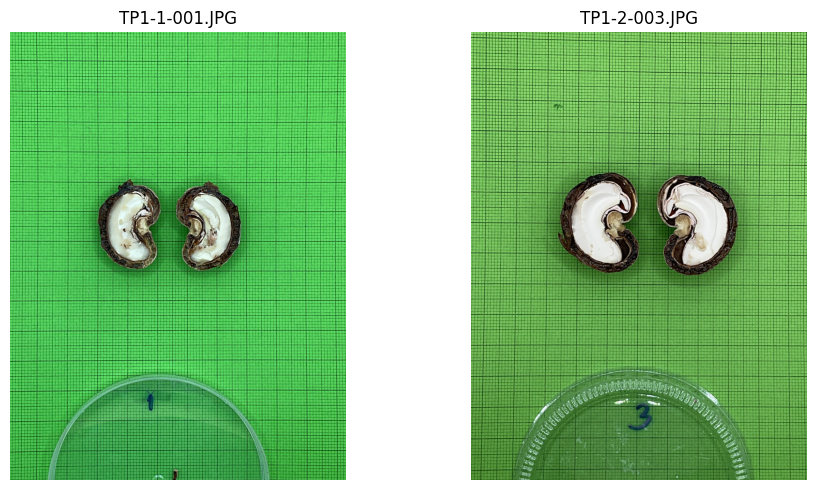

In [13]:
import cv2
import glob
import matplotlib.pyplot as plt

# Get all JPG image file paths
image_paths = glob.glob("data/*.jpg")

# Read images into an array (limit to 5 images)
images = [cv2.imread(img) for img in image_paths[:5] if cv2.imread(img) is not None]

# Plot images
fig, axes = plt.subplots(1, len(images), figsize=(10, 5))  # Create subplots

for ax, img, path in zip(axes, images, image_paths[:5]):
    ax.imshow(img[:,:,::-1])
    ax.set_title(path[5:])  # Show filename as title
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()


In [15]:
for image in image_paths: print(image)

data\TP1-1-001.JPG
data\TP1-2-003.JPG


In [ ]:
# !pip install streamlit

In [4]:
!pip install --upgrade numpy joblib scikit-learn

  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl (12.9 MB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: numpy


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\supab\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\numpy\\random\\tests\\data\\mt19937-testset-2.csv'
Check the permissions.


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\supab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:

!streamlit run app.py


^C


In [3]:
import joblib

# Load the model
model2 = joblib.load("best_logistic_regression_model2.pkl")

model5 = joblib.load("best_logistic_regression_model5.pkl")

model6 = joblib.load("best_ridge_model.pkl")


print(model2)  # Prints model2 details
print(model2.classes_)  # Displays class labels if it's a classifier
print(model2.feature_names_in_)

print(model5)  # Prints model5 details
print(model5.classes_)  # Displays class labels if it's a classifier
print(model5.feature_names_in_)

print(model6.coef_)               # Coefficients of the features
print(model6.intercept_)          # Intercept term
print(model6.feature_names_in_)   # Feature names (if input is DataFrame or has feature names)

LogisticRegression(C=1, class_weight='balanced', multi_class='multinomial')
[  0  50 100]
['actual kernel weight (g)' 'predicted average total area (mm)'
 'Percentage']
LogisticRegression(C=0.001, class_weight='balanced', multi_class='multinomial')
[  0  50 100]
['predicted average total area (mm)' 'actual total weight (g)']
[0.01114742]
[-0.34096282]
['predicted average total area (mm)']


In [4]:
import numpy as np
import pandas as pd

X_test_df = pd.DataFrame([[1.55,448.01713884083,36.00309],[0,462.49,0.287]], columns=['actual kernel weight (g)' ,'predicted average total area (mm)', 'Percentage'])
y_pred = model2.predict(X_test_df)
y_pred

array([100,   0], dtype=int64)

In [5]:
X_test_df = pd.DataFrame([[448.017,4.55],[462.49,3.6]], columns=['predicted average total area (mm)', 'actual total weight (g)'])
y_pred = model5.predict(X_test_df)
y_pred

array([100,   0], dtype=int64)

In [6]:
X_test_df = pd.DataFrame([[448.017],[462.49]], columns=['predicted average total area (mm)'])
y_pred = model6.predict(X_test_df)
y_pred # actual: 4.55, 3.6

array([4.65326981, 4.81460639])

In [8]:
!pip install torch


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\supab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import torch 

state_dict = torch.load("new-only-pics3.pth", map_location=torch.device('cpu'),weights_only=True)

for key, value in state_dict.items():
    print(f"{key}: {value.shape}")

conv1.weight: torch.Size([64, 3, 7, 7])
bn1.weight: torch.Size([64])
bn1.bias: torch.Size([64])
bn1.running_mean: torch.Size([64])
bn1.running_var: torch.Size([64])
bn1.num_batches_tracked: torch.Size([])
layer1.0.conv1.weight: torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight: torch.Size([64])
layer1.0.bn1.bias: torch.Size([64])
layer1.0.bn1.running_mean: torch.Size([64])
layer1.0.bn1.running_var: torch.Size([64])
layer1.0.bn1.num_batches_tracked: torch.Size([])
layer1.0.conv2.weight: torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight: torch.Size([64])
layer1.0.bn2.bias: torch.Size([64])
layer1.0.bn2.running_mean: torch.Size([64])
layer1.0.bn2.running_var: torch.Size([64])
layer1.0.bn2.num_batches_tracked: torch.Size([])
layer1.1.conv1.weight: torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight: torch.Size([64])
layer1.1.bn1.bias: torch.Size([64])
layer1.1.bn1.running_mean: torch.Size([64])
layer1.1.bn1.running_var: torch.Size([64])
layer1.1.bn1.num_batches_tracked: torch.Size([])
layer1.1.conv2.

In [22]:
import torch
import torchvision.models as models
import torch.nn as nn
from torchvision import transforms
from PIL import Image

# 1. Define the model (ResNet-18 with modified fc layer)
model3 = models.resnet18(weights=None) # pretrained=False since we're loading custom weights
num_classes = 3
model3.fc = nn.Linear(model3.fc.in_features, num_classes)  # Modify fc layer to output 3 classes

# 2. Load the state dictionary
state_dict = torch.load("new-only-pics3.pth", map_location=torch.device('cpu'), weights_only=True)
model3.load_state_dict(state_dict)

# 3. Set model3 to evaluation mode for inference
model3.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
def model3_process(image, model):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # ResNet expects 224x224 images
        transforms.ToTensor(),          # Convert to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet normalization
                             std=[0.229, 0.224, 0.225])
    ])
    
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension (1, 3, 224, 224)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    input_batch = input_batch.to(device)
    
    with torch.no_grad():  # Disable gradient computation for inference
        output = model(input_batch)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
    return predicted_class, probabilities

image_path = "data/0_1_2_12_1.jpg" 
image = Image.open(image_path).convert("RGB")
predicted_class, probabilities = model3_process(image, model3)

print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {probabilities.tolist()}")

class_labels = ["0", "50", "100"] 
print(f"Predicted label: {class_labels[predicted_class]}")

Predicted class: 0
Class probabilities: [0.9994020462036133, 0.0005935935769230127, 4.460546279005939e-06]
Predicted label: 0


In [27]:
image_path = "data/50_1_2_1_1.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
predicted_class, probabilities = model6_process(image, model6)

# 7. Print results
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {probabilities.tolist()}")

# Optional: Map predicted class to labels if you have them
class_labels = ["0", "50", "100"]  # Replace with your actual class names
print(f"Predicted label: {class_labels[predicted_class]}")

Predicted class: 1
Class probabilities: [0.0008684437489137053, 0.8422967195510864, 0.15683487057685852]
Predicted label: 50


In [28]:
image_path = "data/100_1_2_4_2.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
predicted_class, probabilities = model6_process(image, model6)

# 7. Print results
print(f"Predicted class: {predicted_class}")
print(f"Class probabilities: {probabilities.tolist()}")

# Optional: Map predicted class to labels if you have them
class_labels = ["0", "50", "100"]  # Replace with your actual class names
print(f"Predicted label: {class_labels[predicted_class]}")

Predicted class: 2
Class probabilities: [0.0003331862681079656, 0.0013986782869324088, 0.9982681274414062]
Predicted label: 100
